In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

In [2]:
# import matplotlib.pyplot as plt

# from src.features.time_series.lagged_impact import plot_lagged_impact
# from src.models.regression import regression

# fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# results = regression(include_controls=False)
# plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0])
# axes[0].set_title("Regression without controls")

# results = regression(lags=0)
# plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[1])
# axes[1].set_title("Regression with controls for weekdays and holidays")
# fig.tight_layout()
# plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

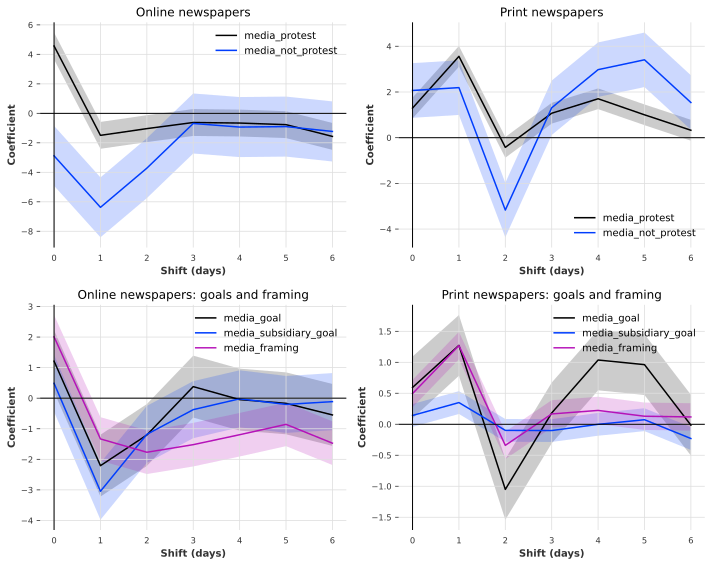

In [5]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

lags = 0
steps = 7
gap = 0
var = "occ_FFF"
cum = False

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
results = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
plot_lagged_impact(results, var, "protest", ax=axes[0, 0])
axes[0, 0].set_title("Online newspapers")

results = regression(
    lags=lags, steps=steps, gap=gap, cumulative=cum, media_source="dereko"
)
plot_lagged_impact(results, var, "protest", ax=axes[0, 1])
axes[0, 1].set_title("Print newspapers")

results = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
plot_lagged_impact(results, var, "goals", ax=axes[1, 0])
axes[1, 0].set_title("Online newspapers: goals and framing")

results = regression(
    lags=lags, steps=steps, gap=gap, cumulative=cum, media_source="dereko"
)
plot_lagged_impact(results, var, "goals", ax=axes[1, 1])
axes[1, 1].set_title("Print newspapers: goals and framing")
fig.tight_layout()
plt.show()

[autoreload of src.models.regression failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

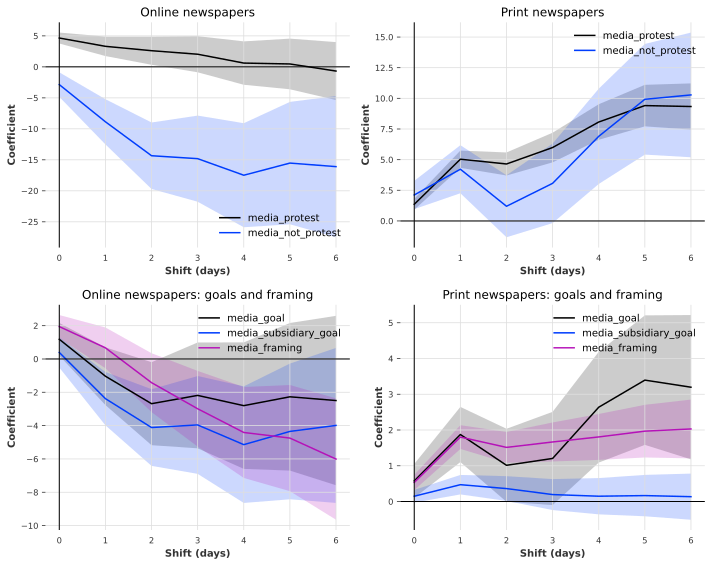

In [9]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

lags = 0
steps = 7
gap = 0
var = "occ_FFF"
cum = True

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
results = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
plot_lagged_impact(results, var, "protest", ax=axes[0, 0])
axes[0, 0].set_title("Online newspapers")

results = regression(
    lags=lags, steps=steps, gap=gap, cumulative=cum, media_source="dereko"
)
plot_lagged_impact(results, var, "protest", ax=axes[0, 1])
axes[0, 1].set_title("Print newspapers")

results = regression(lags=lags, steps=steps, gap=gap, cumulative=cum)
plot_lagged_impact(results, var, "goals", ax=axes[1, 0])
axes[1, 0].set_title("Online newspapers: goals and framing")

results = regression(
    lags=lags, steps=steps, gap=gap, cumulative=cum, media_source="dereko"
)
plot_lagged_impact(results, var, "goals", ax=axes[1, 1])
axes[1, 1].set_title("Print newspapers: goals and framing")
fig.tight_layout()
plt.show()